In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
import sklearn
import matplotlib
import warnings

warnings.filterwarnings('ignore')



# Importar Dados

In [2]:
df_original = pd.read_csv('online_shoppers.csv')
df_original.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


Dicionário de Dados:

"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra.

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico.

O valor do recurso "Taxa de rejeição" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão.

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página.

O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico.

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro.

O conjunto de dados também inclui o tipo de sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.


# Análise Exploratória

In [3]:
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [4]:
df_original.shape

(12330, 18)

In [5]:
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [6]:
df_original.dropna(inplace=True)
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [7]:
df_original.shape

(12316, 18)

In [8]:
df = df_original.copy()

continuous = []
categorical = []

for c in df.columns[:-1]:
  if df.nunique()[c] >= 30:
    continuous.append(c)
  else:
    categorical.append(c)

In [9]:
df.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [10]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [11]:
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [12]:
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [13]:
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


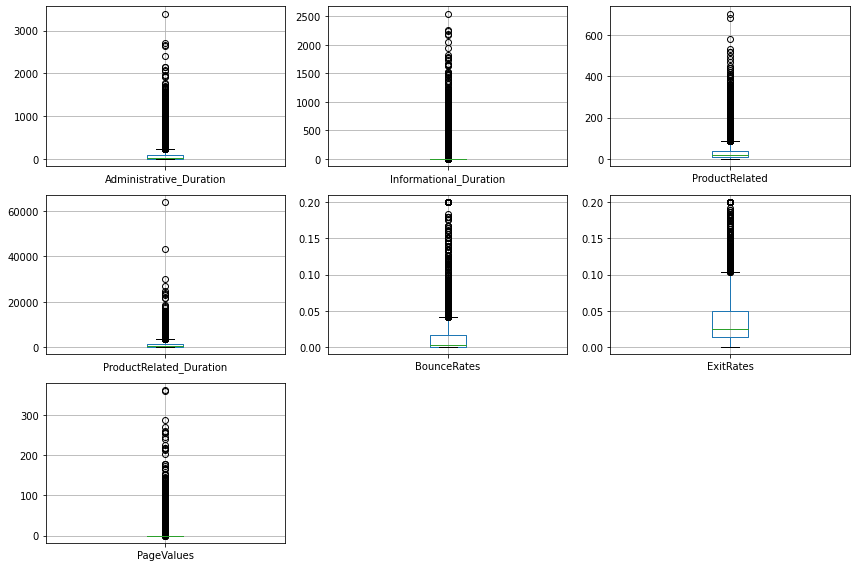

In [14]:
fig = plt.figure(figsize=(12,8))

for i, col in enumerate(continuous):
  plt.subplot(3,3, i + 1);
  df.boxplot(col)
  plt.tight_layout()

## Matriz de Correlação entre variáveis contínuas

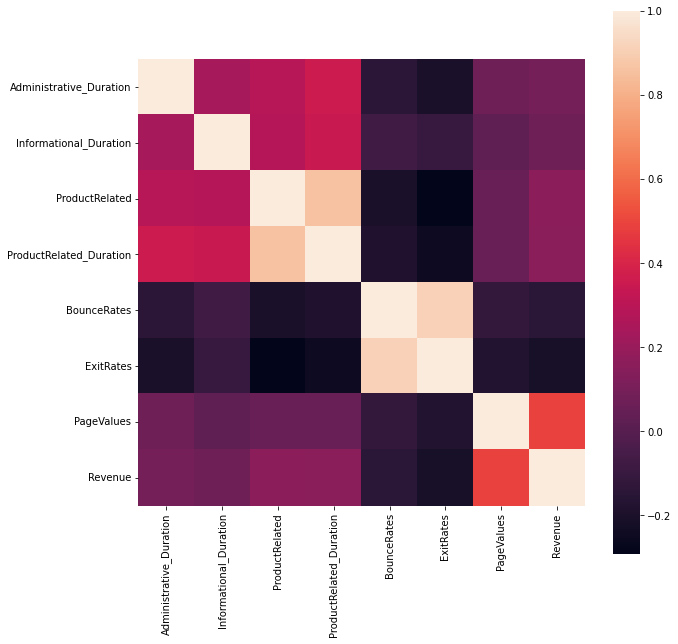

In [15]:
plt.figure(figsize=(10,10))

sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',
                'ProductRelated',
                'ProductRelated_Duration',
                'BounceRates',
                'ExitRates',
                'PageValues',
                'Revenue']].corr(), vmax=1., square=True)

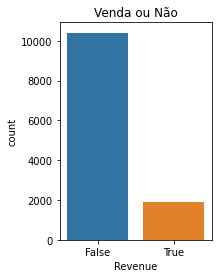

In [16]:
plt.subplot(1,2,2)
plt.title("Venda ou Não")
sns.countplot(df['Revenue'])

## Pré-processamento dos Dados

In [17]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [18]:
df_original['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [19]:
lb = LabelEncoder()

df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

df_original.dropna(inplace=True)

df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [20]:
df_original.iloc[:,0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [21]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


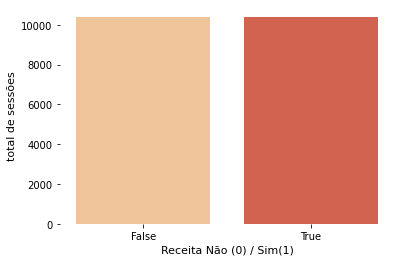

In [22]:
import imblearn
from imblearn.over_sampling import SMOTE

seed = 14

X = df_original.iloc[:, 0:17]
y = df_original.iloc[:, 17]

smote_bal = SMOTE(random_state = seed)

X_res, y_res = smote_bal.fit_resample(X, y)

X = X_res
y = y_res

sns.countplot(y_res, palette='OrRd')
plt.box(False)
plt.xlabel("Receita Não (0) / Sim(1)", fontsize=11)
plt.ylabel("total de sessões", fontsize=11)
plt.show()

In [23]:
print(X.shape)
print(y.shape)

(20816, 17)
(20816,)


In [28]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_treino.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
7900,5.000000,94.600000,0.000000,0.000000,69.000000,2222.419048,0.005093,0.014961,0.000000,0.000000,8,1,1,3,2,2,False
14829,0.000000,0.000000,0.795394,19.884852,16.432241,416.028596,0.000930,0.007938,28.014768,0.204606,6,2,3,1,3,0,True
13152,0.000000,0.000000,0.000000,0.000000,10.000000,443.574953,0.017989,0.040437,38.204310,0.000000,6,1,5,4,3,2,True
3260,0.000000,0.000000,0.000000,0.000000,27.000000,352.083333,0.014815,0.022222,0.000000,0.000000,6,3,2,3,3,2,False
16247,2.284926,10.459884,0.761642,1.523284,26.523284,410.134448,0.005078,0.013385,1.122547,0.238358,3,2,2,2,3,2,True


In [30]:
# Padronizar
sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.fit_transform(X_teste)

In [32]:
X_treino_scaled

array([[ 0.67757905,  0.00347524, -0.45604603, ..., -0.51000525,
         0.54316822, -0.69578072],
       [-0.80412754, -0.5345667 ,  0.16272079, ..., -0.23834425,
        -2.05643898,  1.43723441],
       [-0.80412754, -0.5345667 , -0.45604603, ..., -0.23834425,
         0.54316822,  1.43723441],
       ...,
       [-0.2114449 ,  0.00575026,  1.87776622, ..., -0.51000525,
         0.54316822, -0.69578072],
       [-0.80412754, -0.5345667 , -0.45604603, ..., -0.51000525,
        -2.05643898, -0.69578072],
       [ 0.25480372, -0.30054291, -0.45604603, ...,  0.57663872,
        -2.05643898,  1.43723441]])

In [33]:
# Cria o modelo 
modelo = svm.SVC(kernel='linear')

In [34]:
modelo.fit(X_treino_scaled, y_treino)


SVC(kernel='linear')

In [35]:
previsao = modelo.predict(X_treino_scaled)

In [36]:
SVM_dic_metrics = {'accuracy_score': accuracy_score(previsao, y_treino),
                   'confusion_matrix': confusion_matrix(previsao, y_treino)}

In [37]:
print(SVM_dic_metrics)

{'accuracy_score': 0.8466131356804611, 'confusion_matrix': array([[6628, 1544],
       [ 691, 5708]])}


In [41]:
X_teste['Predicted'] = modelo.predict(X_teste_scaled)
X_teste['Original_Revenue'] = y_teste

In [45]:
X_teste.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Predicted,Original_Revenue
12844,0.393655,5.511175,0.0,0.0,58.866619,1387.368224,0.000000,0.003049,87.200854,0.0,6,1,1,1,6,2,True,True,True
11924,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,4,1,2,True,False,False
812,0.000000,0.000000,0.0,0.0,6.000000,119.000000,0.000000,0.033333,0.000000,0.0,5,3,2,7,1,2,True,False,False
3689,8.000000,276.866667,0.0,0.0,19.000000,548.883117,0.000000,0.007675,5.744058,0.0,6,3,2,1,2,2,True,False,False
2140,2.000000,129.000000,0.0,0.0,31.000000,866.700000,0.011828,0.034101,18.111484,0.0,6,3,2,6,1,2,False,True,True
13339,2.382255,124.250302,0.0,0.0,15.764510,248.232400,0.000000,0.027450,90.371753,0.0,8,1,1,1,8,2,False,True,True
17054,0.000000,0.000000,0.0,0.0,14.000000,838.152425,0.000000,0.016278,55.091310,0.0,5,1,1,3,4,2,False,True,True
3752,0.000000,0.000000,0.0,0.0,2.000000,33.000000,0.000000,0.100000,0.000000,0.0,6,1,8,3,2,2,False,False,False
20565,2.875898,25.853777,0.0,0.0,141.342916,4414.689340,0.004669,0.017191,12.563416,0.0,7,2,2,3,1,2,False,True,True
14148,5.201403,96.117108,0.0,0.0,68.891446,2595.813329,0.001775,0.007619,11.165270,0.0,3,2,2,1,2,1,True,True,True


In [43]:
SVM_dic_metrics = {'accuracy_score': accuracy_score(X_teste['Predicted'], y_teste),
                   'confusion_matrix': confusion_matrix(X_teste['Predicted'], y_teste)}

print(SVM_dic_metrics)

{'accuracy_score': 0.8384307445956766, 'confusion_matrix': array([[2791,  711],
       [ 298, 2445]])}
